In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [194]:
titanic_data=pd.read_csv('C:/Users/He wKai Feng/Desktop/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [195]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [197]:
filt=titanic_data['Cabin'].isnull()
titanic_data[filt]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [198]:
filt1=titanic_data['Age'].isnull()
titanic_data[filt1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [199]:
filt3=titanic_data['Embarked'].isnull()
titanic_data[filt3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [200]:
titanic_data.shape

(891, 12)

In [201]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [202]:
#titanic_data['Age'] = titanic_data['Age'].fillna(-1)   #METHOD 1 TO HANDLE NULL VALUES REPLACE THEM WITH 0
#titanic_data['Age'].isnull().sum()

In [203]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)   #METHOD 2 TO HANDLE NULL VALUES REPLACE THEM WITH specific column mean/mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data['Age'].isnull().sum()

C:\Users\He wKai Feng\AppData\Local\Temp\ipykernel_22192\894000099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)   #METHOD 2 TO HANDLE NULL VALUES REPLACE THEM WITH specific column mean/mode value
C:\Users\He wKai Feng\AppData\Local\Temp\ipykernel_22192\894000099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace metho

0

In [204]:
titanic_data['Embarked'].isnull().sum()

0

In [205]:
titanic_data = titanic_data.drop(columns='Cabin',axis=1) #METHOD 3 TO HANDLE NULL VALUES CABIN COLUMN FROM DATAFRAME
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [206]:
titanic_data['Age'] = titanic_data['Age'].astype(int)  #preprocessing and make my data looks clean, CONVERT FLOAT VALUES TO INTEGERS
titanic_data['Fare'] = titanic_data['Fare'].astype(int)

In [207]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [208]:
titanic_data.isnull().sum() #DOUBLECHECK AFTER HANDLING NULL VALUES TO MAKE SURE NO COLUMN HAS NULL VALUES ANYMNORE

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [209]:
filt_survived=titanic_data['Survived']==1 #num of people survived is 342
print(titanic_data[filt_survived].count())

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            342
SibSp          342
Parch          342
Ticket         342
Fare           342
Embarked       342
dtype: int64


In [210]:
filt_died=titanic_data['Survived']==0 #num of people died is 549
print(titanic_data[filt_died].count())

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            549
SibSp          549
Parch          549
Ticket         549
Fare           549
Embarked       549
dtype: int64


In [211]:
titanic_data['Sex'].value_counts() #NUMBER OF MALE AND FEMALE

Sex
male      577
female    314
Name: count, dtype: int64

In [212]:
#####Data visualization#####
sns.set()

C:\Users\He wKai Feng\AppData\Local\Temp\ipykernel_22192\2320781733.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


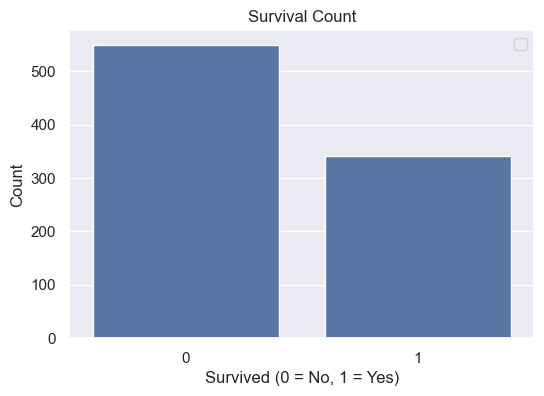

In [213]:
plt.figure(figsize=(6, 4))                    #MAKE A COUNT PLOT FOR VISUALISING THE HOW MANY PEOPLE DIED OR SURVIVED
sns.countplot(data=titanic_data, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend()
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

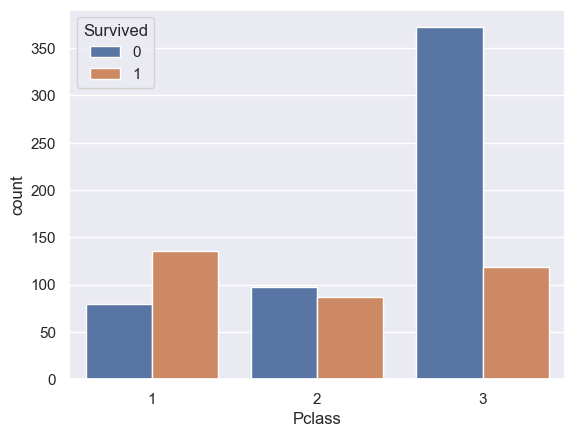

In [214]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

C:\Users\He wKai Feng\AppData\Local\Temp\ipykernel_22192\3729071783.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


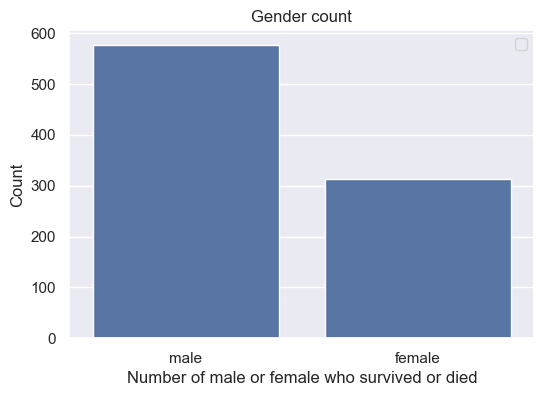

In [215]:
plt.figure(figsize=(6, 4))                  #MAKE A COUNT PLOT FOR VISUALISING THE HOW MANY EACH GENDER DIED OR SURVIVED
sns.countplot(data=titanic_data, x='Sex')
plt.title('Gender count')
plt.xlabel('Number of male or female who survived or died')
plt.ylabel('Count')
plt.legend()
plt.show()

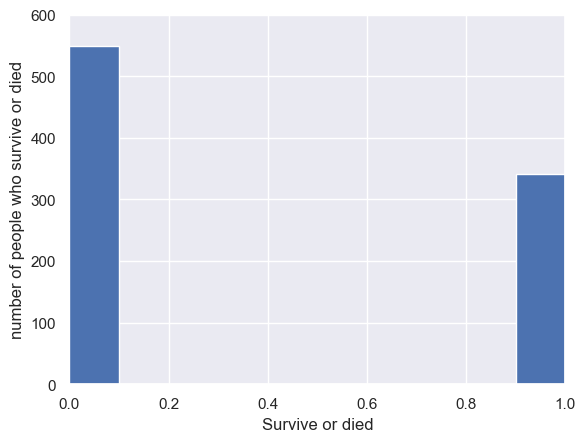

In [216]:
plt.hist(titanic_data['Survived'])
plt.xlim(0,1)
plt.ylim(0,600)
plt.xlabel('Survive or died')
plt.ylabel('number of people who survive or died')
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

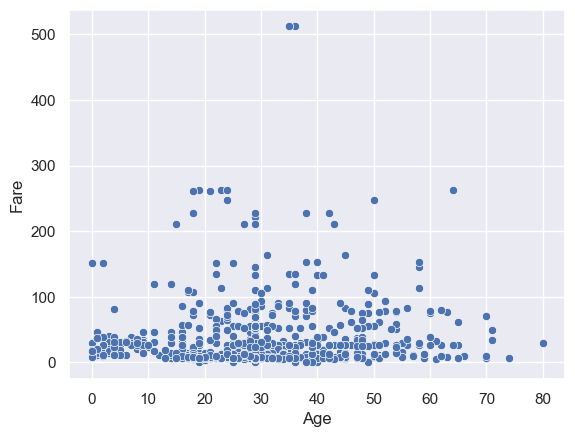

In [217]:
sns.scatterplot(data=titanic_data, x='Age', y='Fare') #SCATTER PLOT FOR RELATIONSHOP BETWEEN FARE AND AGE

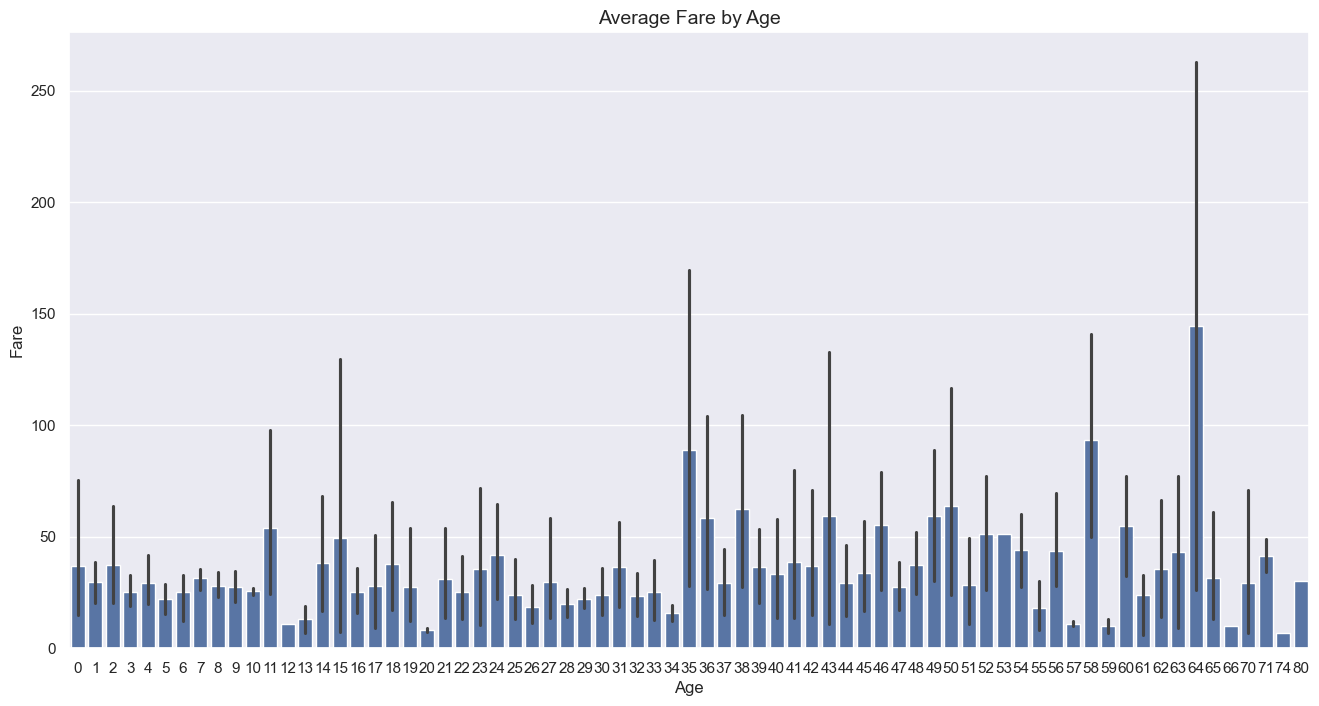

In [218]:
plt.figure(figsize=(16, 8))                                      #BOXPLOT
sns.barplot(data=titanic_data, x='Age', y='Fare')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.title('Average Fare by Age', fontsize=14)
plt.show()

In [219]:
###ENCODING CATEGORICAL TO NUMERICAL##
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [220]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [221]:
import pickle
from sklearn.preprocessing import LabelEncoder

object_columns=titanic_data.select_dtypes(include="object").columns
encoders={}

#CONVERT CATEGORICAL VARIABLES TO NUMERICAL VARIABLES
for column in object_columns:
    label_encoder=LabelEncoder()
    titanic_data[column]=label_encoder.fit_transform(titanic_data[column])
    encoders[column]=label_encoder

# SAVE ENCODERS TO FILE FOR FUTURE USE
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

encoders

{'Name': LabelEncoder(),
 'Sex': LabelEncoder(),
 'Ticket': LabelEncoder(),
 'Embarked': LabelEncoder()}

In [222]:
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22,1,0,523,7,2
1,2,1,1,190,0,38,1,0,596,71,0
2,3,1,3,353,0,26,0,0,669,7,2
3,4,1,1,272,0,35,1,0,49,53,2
4,5,0,3,15,1,35,0,0,472,8,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27,0,0,101,13,2
887,888,1,1,303,0,19,0,0,14,30,2
888,889,0,3,413,0,29,1,2,675,23,2
889,890,1,1,81,1,26,0,0,8,30,0


In [223]:
filt_female_survival=(titanic_data['Sex']==1)&(titanic_data['Survived']==1) #number of female that survived
titanic_data[filt_female_survival].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age            109
SibSp          109
Parch          109
Ticket         109
Fare           109
Embarked       109
dtype: int64

In [224]:
filt_male_survival=(titanic_data['Sex']==0)&(titanic_data['Survived']==1) #number of male survived
titanic_data[filt_male_survival].count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            233
SibSp          233
Parch          233
Ticket         233
Fare           233
Embarked       233
dtype: int64

In [225]:
###Separate features and target (label)###
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_data['Survived']

In [226]:
###SPLIT INTO TRAIN AND TEST DATA
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [227]:
### AFTER TRAIN_TEST_SPLIT AND ENCODING TO NUMERICAL, WE NEED TO DO FEATURES SCALING
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data only and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler (no fitting)
X_test_scaled = scaler.transform(X_test)

In [228]:
###Model training
model=LogisticRegression()

In [229]:
#training logistic regression model with training data
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [230]:
#Model Evaluation (Accuracy score)
##accuracy on training data

X_train_prediction=model.predict(X_train_scaled)
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [231]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("ACCURACY OF TRAINING DATA: ",training_data_accuracy)

ACCURACY OF TRAINING DATA:  0.8103932584269663


In [232]:
#TRAINING WITH DEFAULT HYPERPARAMETERS

#dictionary for models

from sklearn.ensemble import RandomForestClassifier

models={"Logic Regression":LogisticRegression(),
        "Random Forest": RandomForestClassifier(random_state=2)}

In [233]:
#dictionary to store cross validation results
from sklearn.model_selection import cross_val_score

cv_scores={}

#perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters.")
    
    
    if model_name == "Logic Regression":
        scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring="accuracy")
        
    #!!!Random Forest doesn't need scaling 
    else:  # Random Forest
        scores = cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")
    # Split training data into 5 parts
    # Train on 4 parts, test on 1 part
    # Repeat 5 times with different test part
    # Get 5 accuracy scores for each model
    cv_scores[model_name]=scores
    print(f"{model_name} CROSS VALIDATION ACCURACY:{np.mean(scores):.2f}")
    print("-"*70)

cv_scores

Training Logic Regression with default parameters.
Logic Regression CROSS VALIDATION ACCURACY:0.80
----------------------------------------------------------------------
Training Random Forest with default parameters.
Random Forest CROSS VALIDATION ACCURACY:0.80
----------------------------------------------------------------------


{'Logic Regression': array([0.82517483, 0.81118881, 0.80985915, 0.78169014, 0.78873239]),
 'Random Forest': array([0.7972028 , 0.8041958 , 0.86619718, 0.77464789, 0.76056338])}

In [234]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Get the model from your dictionary and fit it
logicregression_from_dict = models["Logic Regression"]
logicregression_from_dict.fit(X_train_scaled, Y_train)

###ACCURACY ON TEST DATA
X_test_prediction_logicregression = logicregression_from_dict.predict(X_test_scaled)

#MODEL EVALUATION
print("ACCURACY SCORE:\n", accuracy_score(Y_test, X_test_prediction_logicregression))
print("\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, X_test_prediction_logicregression))
print("\nCLASSFICATION REPORT:\n", classification_report(Y_test, X_test_prediction_logicregression))

ACCURACY SCORE:
 0.7877094972067039

CONFUSION MATRIX:
 [[90 10]
 [28 51]]

CLASSFICATION REPORT:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83       100
           1       0.84      0.65      0.73        79

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.78       179



In [235]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Get the model from your dictionary and fit it
randomforestfromdict = models["Random Forest"]
randomforestfromdict.fit(X_train, Y_train)

###ACCURACY ON TEST DATA
#!!!Random Forest doesn't need scaling 
X_test_prediction_randomforest = randomforestfromdict.predict(X_test)

#MODEL EVALUATION
print("ACCURACY SCORE:\n", accuracy_score(Y_test, X_test_prediction_randomforest))
print("\nCONFUSION MATRIX:\n", confusion_matrix(Y_test, X_test_prediction_randomforest))
print("\nCLASSFICATION REPORT:\n", classification_report(Y_test, X_test_prediction_randomforest))

ACCURACY SCORE:
 0.8044692737430168

CONFUSION MATRIX:
 [[86 14]
 [21 58]]

CLASSFICATION REPORT:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.81      0.73      0.77        79

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [236]:
X_test_prediction_randomforest

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [237]:
X_test_prediction_logicregression

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [238]:
import pickle

# Save your best performing Random Forest model
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(randomforestfromdict, f)

print("Model saved as 'titanic_model.pkl'")
print("Encoders already saved as 'encoders.pkl'")

Model saved as 'titanic_model.pkl'
Encoders already saved as 'encoders.pkl'


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())